# Time series Analysis

### below topics we are going to  cover in this tutorial

1. data analysis and removing trend season component from data.
2. how totrain the model.
3. how to tune paramter of ARIMA model.


### Autoregressive Integrated Moving Average Model
##### It has below 3 components:
    1. AR: Autoregression
    2. I: Integrated
    3. MA: Moving Average

In [1]:
## import packages/libraries and read the time series data

C:\anaconda_environment\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


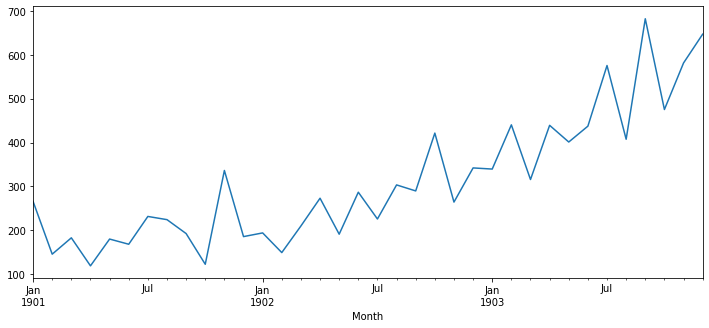

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings("ignore")

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot(figsize=(12,5))
pyplot.show()

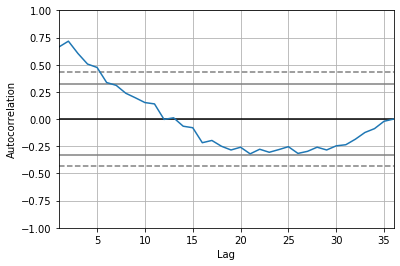

In [3]:
### plotting autocorrelation plot to check AR value 
autocorrelation_plot(series)
pyplot.show()

# lets start with ARIMA modelling

#### The parameters of the ARIMA model are defined as follows:

1. p: The number of lag observations included in the model, also called the lag order.
2. d: The number of times that the raw observations are differenced, also called the degree of differencing.
3. q: The size of the moving average window, also called the order of moving average.

### An ARIMA model can be created using the statsmodels library as follows:

1. Define the model by calling ARIMA() and passing in the p, d, and q parameters.
2. The model is prepared on the training data by calling the fit() function.
3. Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.

In [4]:
# import statmodel library
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd

C:\anaconda_environment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\anaconda_environment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 06 Jul 2020   AIC                            406.340
Time:                        17:09:48   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

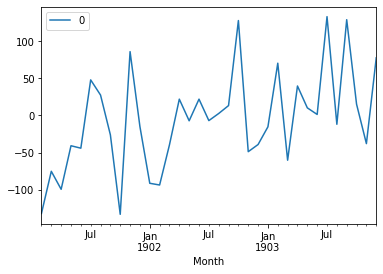

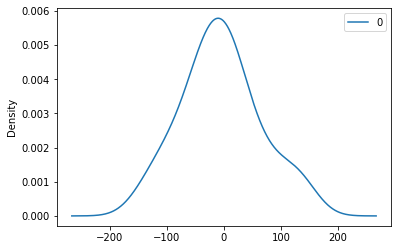

                0
count   35.000000
mean    -5.495190
std     68.132883
min   -133.296590
25%    -42.477882
50%     -7.186531
75%     24.748366
max    133.237980


In [5]:
model = ARIMA(series, order=(5,1,0)) ## (p=5,i=1,q=0) 
#(p=we got 5 from autocorrelation plot,
#d=1,means one month lag or difference to make time series data stationory,
#q=0 means their no seasonality present)
model_fit = model.fit(disp=0) ## fir the model
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid) ## get error term
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Forecast usinf ARIMA Model

#### we will split the data into train and test and then train the model on train data and test error on test data

In [6]:
X=series.values ### convert data frame to series for easy 

In [7]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

predicted=352.377250, expected=342.300000
predicted=307.740336, expected=339.700000
predicted=391.570136, expected=440.400000
predicted=354.430929, expected=315.900000
predicted=389.660238, expected=439.300000
predicted=352.595848, expected=401.300000
predicted=449.205250, expected=437.400000
predicted=399.951092, expected=575.500000
predicted=440.644907, expected=407.600000


C:\anaconda_environment\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=620.264176, expected=682.000000
predicted=449.567435, expected=475.300000
predicted=665.409777, expected=581.300000
predicted=575.991910, expected=646.900000
Test MSE: 4496.369


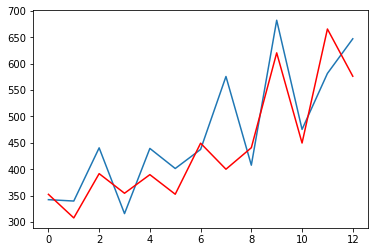

In [8]:
for t in range(len(test)):
    model = ARIMA(history, order=(6,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# tunning arima parameter (p,d,q)

In [9]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [10]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [11]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=52425.268
ARIMA(0, 0, 1) MSE=38145.205
ARIMA(0, 0, 2) MSE=23989.538
ARIMA(0, 1, 0) MSE=18003.173
ARIMA(0, 1, 1) MSE=9558.155
ARIMA(0, 1, 2) MSE=6306.923
ARIMA(0, 2, 0) MSE=67339.808
ARIMA(0, 2, 1) MSE=18321.854
ARIMA(1, 0, 0) MSE=23113.088
ARIMA(1, 0, 2) MSE=7289.003
ARIMA(1, 1, 0) MSE=7121.370
ARIMA(1, 1, 1) MSE=7003.686
ARIMA(1, 2, 0) MSE=18608.011
ARIMA(2, 0, 0) MSE=10253.874
ARIMA(2, 1, 0) MSE=5689.922
ARIMA(2, 1, 1) MSE=7759.705
ARIMA(2, 2, 0) MSE=9860.937
ARIMA(4, 0, 0) MSE=11297.723
ARIMA(4, 1, 0) MSE=6649.593
ARIMA(4, 1, 1) MSE=6796.280
ARIMA(4, 2, 0) MSE=7596.330
ARIMA(4, 2, 1) MSE=4694.876
ARIMA(6, 1, 0) MSE=6810.071
ARIMA(6, 1, 1) MSE=4402.305
ARIMA(6, 2, 0) MSE=6261.138
ARIMA(8, 1, 0) MSE=6579.652
ARIMA(10, 1, 0) MSE=7532.639
Best ARIMA(6, 1, 1) MSE=4402.305


In [12]:
## other example 
# load dataset
daily_birth = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv', header=0, index_col=0)

In [13]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(daily_birth.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=67.063
ARIMA(0, 0, 1) MSE=62.165
ARIMA(0, 0, 2) MSE=60.386
ARIMA(0, 1, 0) MSE=84.038
ARIMA(0, 1, 1) MSE=56.653
ARIMA(0, 1, 2) MSE=55.272
ARIMA(0, 2, 0) MSE=246.414
ARIMA(0, 2, 1) MSE=84.658
ARIMA(0, 2, 2) MSE=57.130
ARIMA(1, 0, 0) MSE=60.876
ARIMA(1, 0, 1) MSE=57.058
ARIMA(1, 1, 0) MSE=65.928
ARIMA(1, 1, 1) MSE=55.129
ARIMA(1, 1, 2) MSE=55.192
ARIMA(1, 2, 0) MSE=143.755
ARIMA(2, 0, 0) MSE=59.251
ARIMA(2, 0, 1) MSE=55.075
ARIMA(2, 0, 2) MSE=56.000
ARIMA(2, 1, 0) MSE=59.487
ARIMA(2, 1, 1) MSE=55.013
ARIMA(2, 1, 2) MSE=55.266
ARIMA(2, 2, 0) MSE=107.600
ARIMA(4, 0, 0) MSE=59.189
ARIMA(4, 0, 1) MSE=61.290
ARIMA(4, 0, 2) MSE=55.439
ARIMA(4, 1, 0) MSE=57.428
ARIMA(4, 1, 1) MSE=55.862
ARIMA(4, 1, 2) MSE=55.548
ARIMA(4, 2, 0) MSE=80.207
ARIMA(6, 0, 0) MSE=58.773
ARIMA(6, 0, 1) MSE=59.454
ARIMA(6, 1, 0) MSE=53.187
ARIMA(6, 1, 1) MSE=57.287
ARIMA(6, 1, 2) MSE=55.704
ARIMA(6, 2, 0) MSE=69.753
ARIMA(8, 0, 0) MSE=56.984
ARIMA(8, 0, 1) MSE=57.224
ARIMA(8, 0, 2) MSE=58.134
ARIMA(8, 